#Data
ข้อมูลเกี่ยวกับราคาและคุณสมบัติอื่นๆของเพชรประมาณ 54,000 ชิ้นในประเทศอังกฤษ

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Visualization/diamonds.xlsx')

In [4]:
df.tail(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.shape

(53940, 11)

In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

# Creates a plot with 7 subplots showing the data for each variable.

In [8]:
values = df.values
values

array([[1, 0.23, 'Ideal', ..., 3.95, 3.98, 2.43],
       [2, 0.21, 'Premium', ..., 3.89, 3.84, 2.31],
       [3, 0.23, 'Good', ..., 4.05, 4.07, 2.31],
       ...,
       [53938, 0.7, 'Very Good', ..., 5.66, 5.68, 3.56],
       [53939, 0.86, 'Premium', ..., 6.15, 6.12, 3.74],
       [53940, 0.75, 'Ideal', ..., 5.83, 5.87, 3.64]], dtype=object)

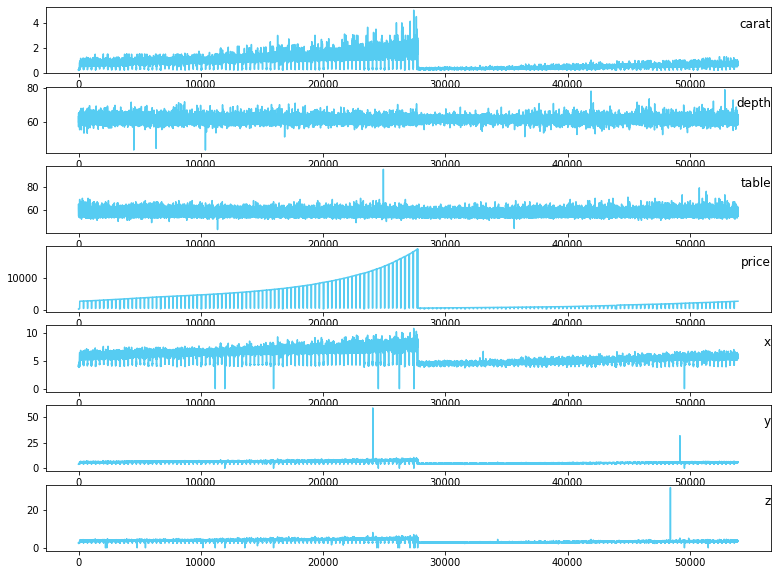

In [9]:
groups = [1, 5, 6, 7, 8, 9, 10]

i = 1
plt.figure(figsize=(13,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group],color = '#56CCF2')
    plt.title(df.columns[group], y=0.6, loc='right')
    i += 1
    
plt.show()

# Data Exploration 
 - Pair Plot
 - Bar Plot
 - Scatter Plot

In [10]:
df.sample(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
4030,4031,0.90,Very Good,E,SI2,63.2,59.0,3526,6.10,6.15,3.87
16345,16346,1.03,Very Good,G,VS1,62.2,57.0,6539,6.42,6.47,4.01
33597,33598,0.37,Ideal,G,VS2,62.2,57.0,833,4.64,4.59,2.87


<Figure size 864x864 with 0 Axes>

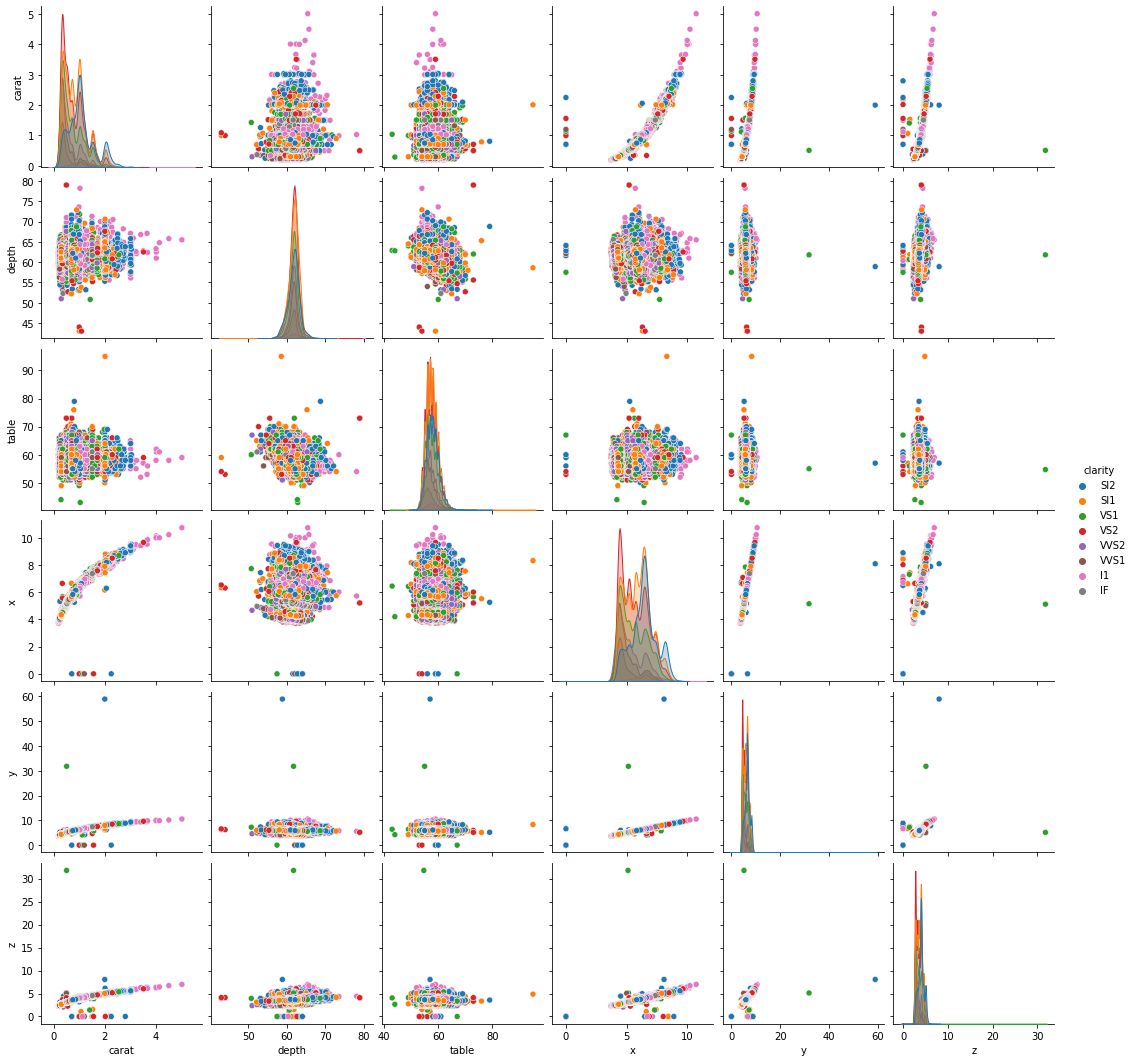

In [11]:
plt.figure(figsize=(12,12))
sns.pairplot(df[['carat','depth', 'table','x', 'y', 'z','clarity']], hue= 'clarity')


จากรูป เป็นการเปรียบเทียบข้อมูลแต่ละคู่ของทุกๆตัวแปรแบบคร่าวๆ 

In [12]:
price_list = list(df["price"].values)

In [13]:
price_cats = []
for elem in price_list:
    if elem < 4000:
        price_cats.append("Extremely Cheap")
    elif elem < 7700:
        price_cats.append("Cheap")
    elif elem < 11000:
        price_cats.append("Ordinary Normal")
    elif elem < 14700:
        price_cats.append("Expensive")
    else:
        price_cats.append("Extremely Expensive")

In [14]:
my_c = {'Extremely Cheap': '#904e95',
            'Cheap':'#FF8235' ,
            'Ordinary Normal': '#0ED2F7' ,
            'Expensive': '#ff00cc',
            'Extremely Expensive': '#4AC29A'}

In [15]:
df.shape[0], len(price_cats)

(53940, 53940)

In [16]:
df["price_cat"] = price_cats
df.sample(3)    

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
5811,5812,0.91,Premium,E,SI1,61.5,60.0,3911,6.19,6.24,3.82,Extremely Cheap
20370,20371,0.31,Very Good,G,VS1,59.6,61.0,625,4.35,4.38,2.60,Extremely Cheap
17486,17487,2.01,Good,H,I1,63.9,59.0,7024,8.01,7.92,5.09,Cheap


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


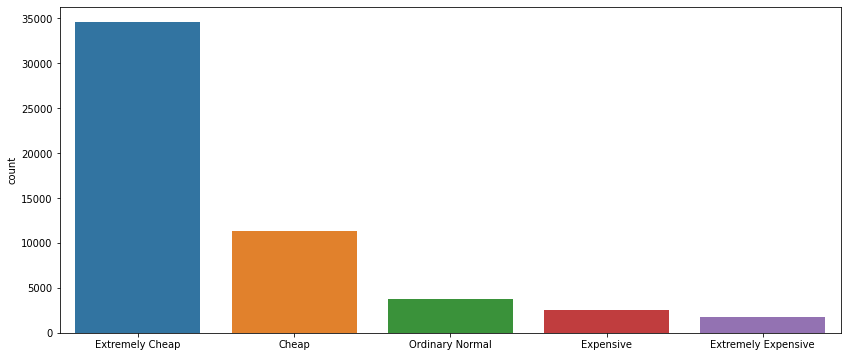

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(price_cats)

# สรุป


---


จากรูป สังเกตได้ว่าในท้องตลาดของการขายเพชรนั้น ส่วนใหญ่จะนิยมซื้อเพชรที่มีความคุ้มค่า ซึ่งคือเพชรระดับ Extremely Cheap และไม่นิยมซื้อเพชรระดับ Extremely Expensive ที่มีราคาแพงกว่ามาก ทำให้ในท้องตลาดนั้นมีเพชรระดับ Extremely Cheap เป็นส่วนใหญ่ ซึ่งตรงตามความต้องการของผู้ซื้อมากที่สุด

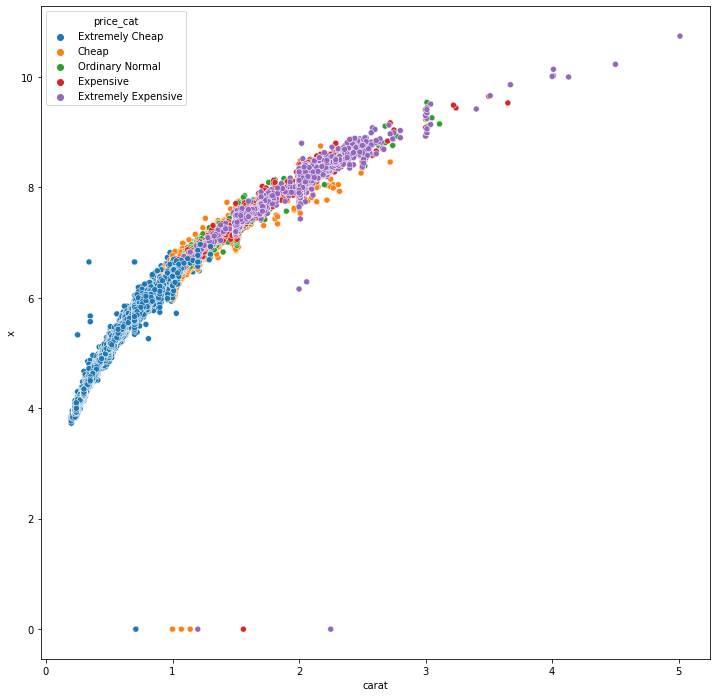

In [18]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = df['carat'], y = df['x'], hue = df['price_cat'])

# สรุป

---


จากรูป 
เป็นแผนภาพการกระจายที่แสดงถึงความสัมพันธ์ของตัวแปร carat และตัวแปร x ซึ่งคือ ความกว้างของเพชร โดยทั้งสองตัวแปรมีการเปลี่ยนแปลงไปในทิศทางเดียวกัน
ส่วนสีในภาพเป็นการแบ่งตามช่วงราคาของเพชร

ดังนั้น โดยส่วนใหญ่เมื่อเพชรมีกะรัตที่ใหญ่ และมีความกว้างมากจะส่งผลให้เพชรเม็ดนั้นเป็นเพชรที่มีราคาสูง
แต่ก็ยังมีเพชรบางเม็ดที่ไม่ได้มีกะรัตใหญ่ และไม่ได้เป็นเพชรที่มีความกว้าง เเต่ก็เป็นเพชรที่มีราคาสูงอยู่ในระดับ Extremely Expensive ดังนั้นราคาของเพชรไม่ได้ขึ้นอยู่กับกะรัต และความกว้างของเพชรเพียง 2 ปัจจัยเเต่ยังคงขึ้นอยู่กับปัจจัยอื่นๆอีกด้วย



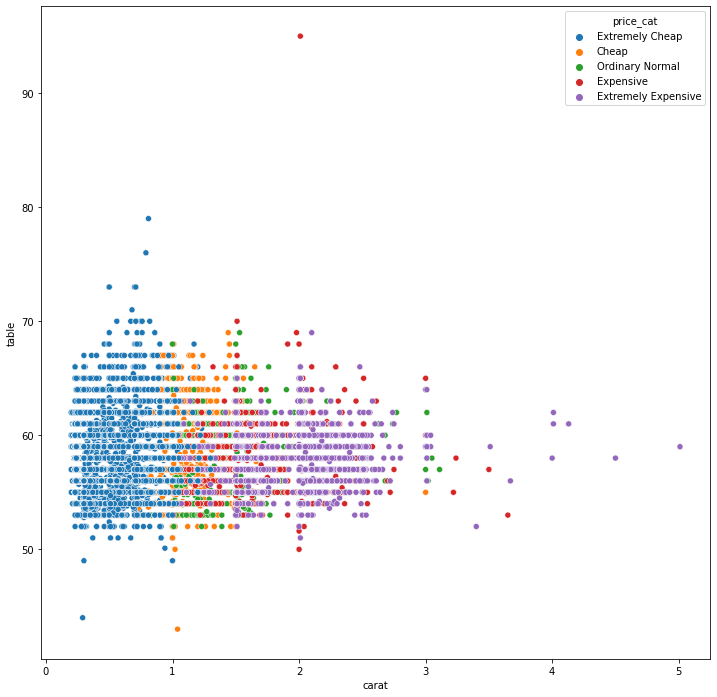

In [19]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = df['carat'], y = df['table'], hue = df['price_cat'])

# สรุป


---




จากรูป เป็นแผนภาพการกระจายที่แสดงถึงความสัมพันธ์ของตัวแปร x ซึ่งคือ carat และตัวแปร y ซึ่งคือ table หรือหน้าเพชร โดยทั้งสองตัวแปรมีการเปลี่ยนแปลงไปในทิศทางเดียวกัน ส่วนสีในภาพเป็นการแบ่งตามช่วงราคาของเพชร

ดังนั้น โดยส่วนใหญ่เมื่อเพชรมีกะรัตที่ใหญ่ และมีหน้าเพพชที่กว้างจะส่งผลให้เพชรเม็ดนั้นเป็นเพชรที่มีราคาสูง แต่ก็ยังมีเพชรบางเม็ดที่ไม่ได้มีกะรัตใหญ่ และไม่ได้เป็นเพชรที่มีหน้าเพชรกว้าง เเต่ก็เป็นเพชรที่มีราคาสูงอยู่ในระดับ Extremely Expensive ดังนั้นราคาของเพชรไม่ได้ขึ้นอยู่กับกะรัต และหน้าเพชรเพียง 2 ปัจจัยเเต่ยังคงขึ้นอยู่กับปัจจัยอื่นๆอีกด้วย

In [20]:
df[['carat','depth', 'table', 'price', 'x', 'y', 'z']].corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


# Correlation
 - Heatmap

In [21]:
df_corr = df[['carat','depth', 'table', 'price', 'x', 'y', 'z']].corr()
df_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

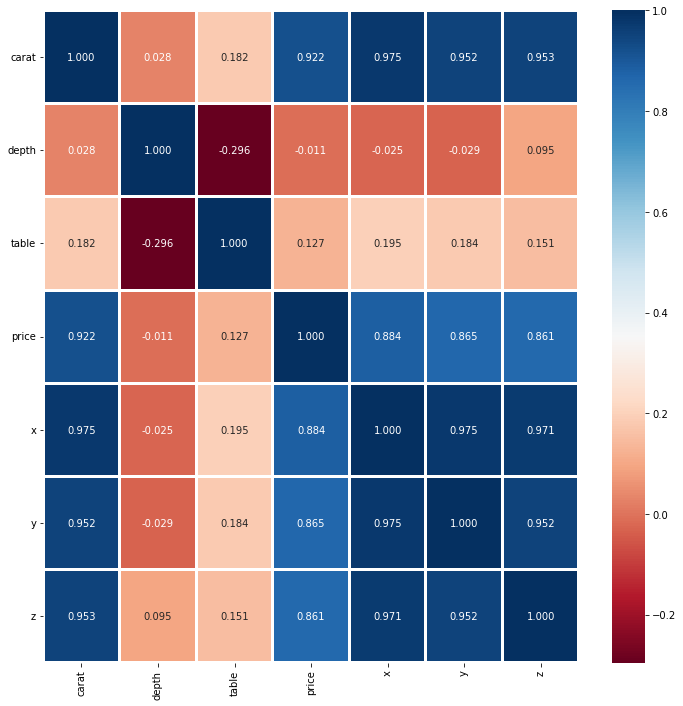

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, cmap="RdBu", annot=True, fmt='.3f', linewidths=2)
plt.xticks(rotation=90)
plt.yticks(rotation=360)

# สรุป

---




จากรูป เป็นรูปที่แสดงความสัมพันธ์ของตัวแปรทุกตัวแปร และสีในรูปเป็นการบ่งบอกถึงระดับความสัมพันธ์ของตัวแปรต่างๆ

ซึ่งในที่นี้เราสนใจในเรื่องราคาเพชร จากรูปก็จะสามารถดูได้ว่าตัวแปรไหนที่ส่งผลมากต่อราคาเพชรบ้าง

    1. ตัวแปร carat ที่มีความสัมพันธ์มากถึง 0.922 
    2. ตัวแปร x หรือความกว้างของเพชร ที่มีความสัมพันธ์มากถึง 0.884
    3. ตัวแปร y หรือความยาวของเพชร ที่มีความสัมพันธ์มากถึง 0.865
    4. ตัวแปร z หรือความสูงของเพชร ที่มีความสัมพันธ์มากถึง 0.861



# Bar Plot

In [23]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [24]:
df['clarity'].value_counts().index

Index(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object')

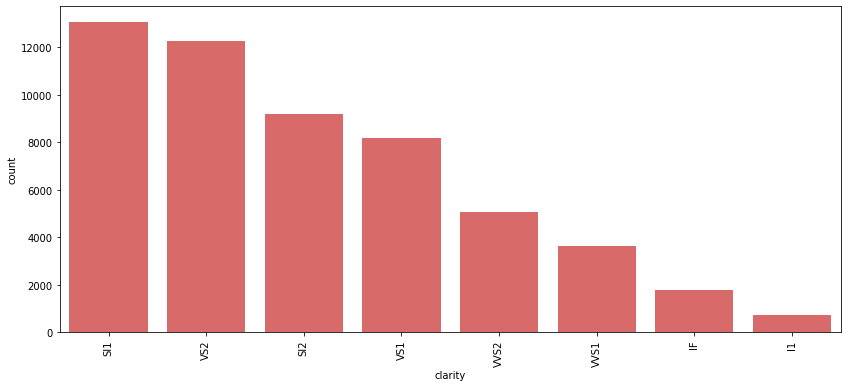

In [25]:
plt.figure(figsize=(14,6))

sns.countplot(x='clarity',data=df,
              order = df['clarity'].value_counts().index,
               color = '#EB5757')

plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams["axes.labelsize"] = 15

# สรุป

---



จากรูป เรียงข้อมูลตามระดับความใสสะอาดของเพชรในท้องตลาดโดย I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1 และ IF(best) ในที่นี้จะสังเกตได้ว่า I1 เป็นเพชรที่มีความใสสะอาดน้อยที่สุด ทำให้มีอยู่ในท้องตลาดน้อย เนื่องด้วยองค์ประกอบในการซื้อเพชรของผู้ซื้อจะดูจากสว่างของเพชรเป็นอย่างแรก 

ส่วน SI1 และ VS2 นั้นเป็นเพชรที่มีระดับความใสสะอาดระดับกลางๆ แต่คุ้มค่ากับราคาเพชรที่จะเสียเงินซื้อไป ทำให้มีขายเพชรระดับ SI1 และ VS2 ได้เป็นจำนวนมาก และเมื่อขายได้จำนวนมาก ผู้ผลิตจะผลิตเพชรออกมาจำนวนมากตามความต้องการของผู้ซื้อ

# Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


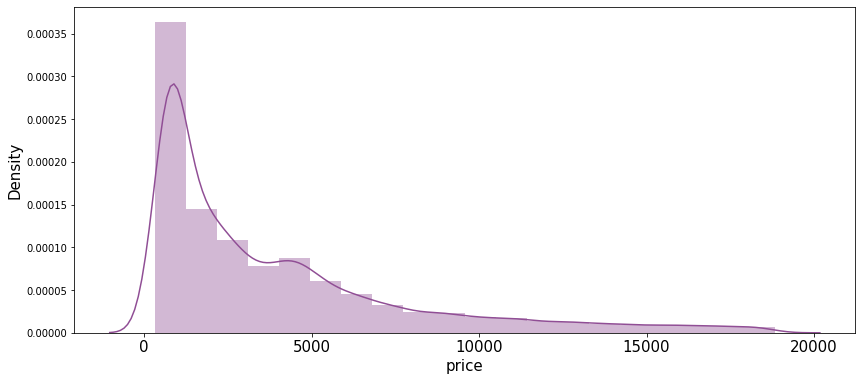

In [26]:
plt.figure(figsize=(14, 6))
sns.distplot(df['price'], bins= 20, color='#904e95', )

# สรุป

---


จากรูป จะสังเกตได้ว่าข้อมูลเพชรที่มีราคาไม่เกิน 5000 dollar มีจำนวนมาก  ทำให้กราฟที่ได้เป็นมีการแจกแจงข้อมูลแบบเบ้ขวา  
ดังนั้น ในท้องตลาดทั่วไปนั้นจะมีการค้าขายเพชรราคาไม่เกิน 5000 dollar มากกว่าเพชรที่มีราคาตั้งแต่ 5000 dollar ขึ้นไป